# **Welcome to the Notebook**

### Let's mount the google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

Importing the modules

In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max,struct
import matplotlib.pyplot as plts

creating spark session

*italicized text*

In [5]:
spark=SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [16]:
from pickle import TRUE
litening_csv_path='/content/drive/MyDrive/listenings.csv'
listening_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(litening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df=listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df.na.drop()

DataFrame[user_id: string, track: string, artist: string, album: string]

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [ ]:
sp=(listening_df.count(),len(listening_df.columns))
print(sp)

(14650594, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
qo= listening_df.select('track','artist')
qo.show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1=listening_df.filter(listening_df.artist=='Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|Rihanna - We All ...|Rihanna|                NULL|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q3=listening_df.filter(listening_df.artist=='Rihanna').groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [ ]:
q4=listening_df.select('artist','track').groupBy('artist','track').agg(count('artist').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+--------------------+-----------------+-----+
|              artist|            track|count|
+--------------------+-----------------+-----+
|       Justin Bieber|            Sorry| 3492|
|      Arctic Monkeys| Do I Wanna Know?| 2986|
|            Bon Iver|      Skinny Love| 2933|
|         The Killers|    Mr Brightside| 2844|
|                Zayn|       PILLOWTALK| 2772|
|            Bastille|          Pompeii| 2752|
|      Mumford & Sons|  Little Lion Man| 2725|
|             Rihanna|             Work| 2691|
|      Mumford & Sons|         The Cave| 2653|
|Florence + the Ma...|Dog Days Are Over| 2606|
+--------------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
q5=listening_df.filter(listening_df.artist=='Rihanna').groupBy('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2691|
|Rihanna|Only Girl (In the...| 1829|
|Rihanna|We Found Love (fe...| 1754|
|Rihanna|            Rude Boy| 1390|
|Rihanna|                 S&M| 1368|
|Rihanna|            Diamonds| 1314|
|Rihanna|      Kiss it Better|  953|
|Rihanna| Where Have You Been|  899|
|Rihanna|Cheers (Drink to ...|  715|
|Rihanna|           Disturbia|  691|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [ ]:
q6=listening_df.select('artist','album').groupBy('artist','album').agg(count('artist').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [10]:
from pickle import TRUE
genre_csv_path='/content/drive/MyDrive/genre.csv'
genre_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [22]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [20]:
data=listening_df.join(genre_df,how='inner',on=['artist']).select('user_id').where(genre_df.genre=='pop').groupBy('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
data.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|    musicboy80s|  384|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  371|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|        DP_Sage|  320|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [28]:
q7=genre_df.select('genre').groupBy('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-----+
|     genre|count|
+----------+-----+
|      rock| 9066|
|       pop| 6960|
|electronic| 4410|
|      jazz| 4400|
|   hip hop| 4288|
|     house| 3310|
|      folk| 3217|
|     dance| 2894|
|      punk| 2661|
|soundtrack| 2360|
+----------+-----+



# Task 5:
**Query #8**

find out each user favourite genre

In [30]:
join=listening_df.join(genre_df,how='inner',on=['artist'])

q8=join.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('count'))
q8.show()

+---------------+--------------------+-----+
|        user_id|               genre|count|
+---------------+--------------------+-----+
|          _0015|     psychedelic pop|    3|
|        01Green|          Maty Noyes|    1|
|      01srainey|            Big Sean|    2|
|      03swalker|                soul|    4|
|        0502008|       Keys N Krates|    2|
|       07berobe|national socialis...|   14|
|       07berobe|        gothic metal|    8|
|          0rdos|              celtic|    1|
|     0xenolith0|       drum and bass|    1|
|    100thwindow|             country|    1|
|10bobrevolution|         000 Fathers|    4|
| 11shadesofgrey|          electronic|    6|
| 11shadesofgrey|             baroque|    1|
|      1337fatal|                jazz|   14|
|        14M5K0T|                jazz|   70|
|          16-19| June Carter & Me...|    1|
|          16-19| Kanye West & Pau...|    1|
|   1888Franklin|               metal|   17|
|           1936|       Woody Jackson|    1|
|       19

In [37]:
q8_2=q8.groupBy('user_id').agg(max(struct(col('count'),col('genre'))))
q8_2.show()

+---------------+-------------------------+
|        user_id|max(struct(count, genre))|
+---------------+-------------------------+
|      --Shinn--|              {112, rock}|
|       --ollz--|               {47, rock}|
|     -Amnesiac-|             {323, metal}|
|         -Bish-|              {107, rock}|
|        -Danni-|               {49, rock}|
|          -DeWp|            {87, hip hop}|
|      -Faction-|               {57, rock}|
|-February-Star-|               {74, rock}|
|        -Gemma-|        {38, british pop}|
|   -Gingergirl-|                {28, pop}|
|        -Hazel-|           {15, synthpop}|
|        -Heiko-|         {43, electronic}|
|-InsertNameHere|                {68, ska}|
|         -Katie|              {58, lo-fi}|
|      -Krystal-|               {87, rock}|
|         -Mark-|         {37, indie rock}|
|       -Mullet-|          {64, metalcore}|
|          -Robs|               {38, rock}|
| -SleepingStar-|        {57, black metal}|
|      -Stifler-|              {

**Query #9**

find out how many pop,rock,metal and hip hop singers we have
from pyspark.sql.functions import col, count

q9 = genre_df.filter(
    (col('genre') == 'pop') |
    (col('genre') == 'rock') |
    (col('genre') == 'metal') |
    (col('genre') == 'hip hop')
).groupBy('genre').agg(
    count('genre').alias('count')
)

q9.show()

and then visulize it using bar chart

from pyspark.sql.functions import col, count

q9 = genre_df.filter(
    (col('genre') == 'pop') |
    (col('genre') == 'rock') |
    (col('genre') == 'metal') |
    (col('genre') == 'hip hop')
).groupBy('genre').agg(
    count('genre').alias('count')
)

q9.show()

Now, let's visualize the results using ***matplotlib***

In [48]:
from pyspark.sql.functions import col, count

q9 = genre_df.filter( (col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop') ).groupBy('genre').agg( count('genre').alias('count') )

q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [53]:
q_list=q9.collect()

labels=[row['genre'] for row in q_list]
values=[row['count'] for row in q_list]

<BarContainer object of 4 artists>

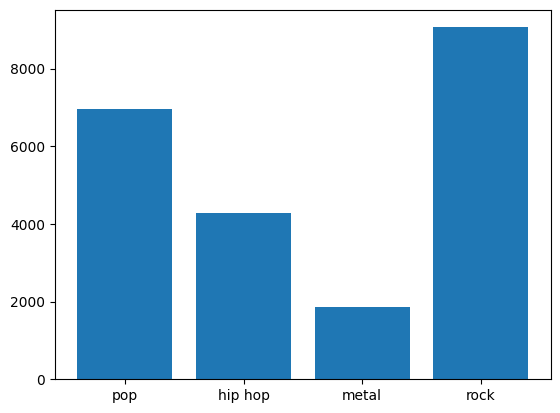

In [54]:
from matplotlib import pyplot as plt
plt.bar(labels,values)

now lets visualize these two lists using a bar chart